# Q1:How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**ANS) Given Matrices a(n,k) and b(k,m)Let c be the resultant matrix of matrix multiplication of a and b, and the resultant matrix will have dimension (n,m), hence the matrix "c" will contain n*m elements**

**To get an element of the matrix "c" at a position(row,column), we multiply the elements of the row of the first matrix correspondingly with the elements of the column of the second matrix and add them. Because there are k elements in the row of the first matrix and k elements in the column of the second matrix, there will be k Multiplications and we need addition k-1 times to get an element of the resultant matrix.**

# Q2:Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [40]:
import time
m1 = [[1,2,3],[4,5,6],[7,8,9]]
m2 = [[1,2,3],[4,5,6],[7,8,9]]
start = time.time()
result_matrix = [[0,0,0],[0,0,0],[0,0,0]]
for row in range(3) :
    for col in range(3) :
        result_matrix[row][col] = m1[row][0]*m2[0][col] + m1[row][1]*m2[1][col] + m1[row][2]*m2[2][col]
end = time.time()
print(f"{(end-start)*1000} ms")

start = time.time()
np.matmul(m1,m2)
end = time.time()

print(f"{(end-start)*1000} ms")

0.26798248291015625 ms
0.1709461212158203 ms


# Matrix multiplication using numpy is almost twice as fast compared to multiplication using loops. Numpy is optimized for all math operations

# Q3:Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [38]:
a = [1,2,3,4,5,6,7,8]
l = len(a)
prev = np.Infinity
if l%2 :
  for _ in range(l//2+1) :
    cur = -np.Infinity
    for i in range(l) :
      if (prev > a[i] > cur) :
        cur = a[i]
    prev = cur
  med = cur
else :
  for _ in range(l//2) :
    cur = -np.Infinity
    for i in range(l) :
      if (prev > a[i] > cur) :
        cur = a[i]
    prev = cur
  cur = -np.Infinity
  for i in range(l) :
      if (prev > a[i] > cur) :
        cur = a[i]
  med = (cur + prev)/2

print(f"Median is {med}")
a1 = np.sort(a)
if l%2 :
  med = a1[l//2]
else :
  med = (a1[l//2-1] + a1[l//2])/2
print(f"Median is {med}")

Median is 4.5
Median is 4.5


# This method of determining the median by identifying the biggest element in one array pass requires n/2 array passes. One array pass takes O(n) time. As a result, the temporal complexity of this method is O(n2).
# One easy technique to reduce time complexity is to sort the array in n*log(n) time and then determine the median in constant time.

# Q4: What is the gradient of the following function with respect to x and y?

$f(x,y)=x^2*y + y^3 sin(x)$

Ans)**partial_x=partion derivation of function with respect to $x =2xy+y^3cos(x)$**

**partial_y=partion derivation of function with respect to $y =x^2+3y^2*sin(x)$**


 **Gradiant ∇f=[[partial_x],[partial_y]] of size (2x1) is a vertical matrix**




# Q5: Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y


In [1]:
import jax.numpy as jnp
from jax import grad, random


def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_grad(x, y):
    partial_x = 2 * x * y + y**3 * jnp.cos(x)
    partial_y = x**2 + 3 * y**2 * jnp.sin(x)
    return partial_x, partial_y

key = random.PRNGKey(123)
x_random = random.uniform(key)
y_random = random.uniform(key)

grad_f = grad(f, argnums=(0, 1))
p_x_jax, p_y_jax = grad_f(x_random, y_random)

p_x_analytical, p_y_analytical = analytical_grad(x_random, y_random)

print("Analytical Gradient wrt x:", p_x_analytical)
print("JAX Computed Gradient wrt x:", p_x_jax)
print("Analytical Gradient wrt y:", p_y_analytical)
print("JAX Computed Gradient wrt y:", p_y_jax)


Analytical Gradient wrt x: 0.11308805
JAX Computed Gradient wrt x: 0.11308805
Analytical Gradient wrt y: 0.085141405
JAX Computed Gradient wrt y: 0.085141405


# Q6: Use sympy to confirm that you obtain the same gradient analytically.

In [11]:
import sympy as sp
# Variables
x, y = sp.symbols("x y")

# Define the function f(x, y) = x^2 * y + y^3 * sin(x)
f = x**2 * y + y**3 * sp.sin(x)

# Calculate the partial derivatives
partial_x = sp.diff(f, x)
partial_y = sp.diff(f, y)

# Choose specific values for x and y
a = 1
b = 2

# Evaluate the partial derivatives
x_val = partial_x.evalf(subs={x: a, y: b})
y_val = partial_y.evalf(subs={x: a, y: b})

# Print
print("Analytical Gradient wrt x:", x_val)
print("Analytical Gradient wrt y:", y_val)


Analytical Gradient wrt x: 8.32241844694512
Analytical Gradient wrt y: 11.0976518176948


# Q9:Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


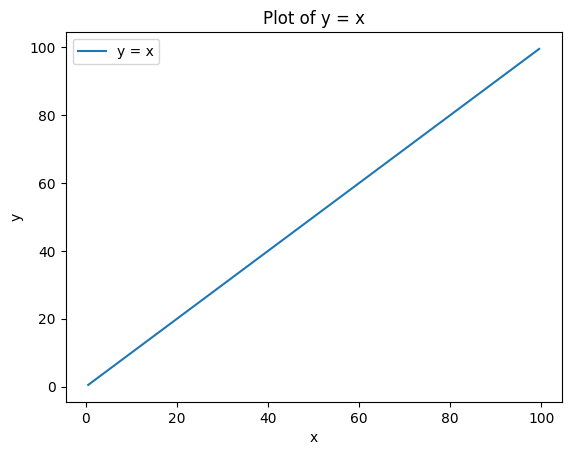

In [24]:

import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0.5, 100.0, 0.5)

y_values0 = x_values
y_values1 = x_values**2
y_values2 = (x_values**3)/100
y_values3 = np.sin(x_values)
y_values4 = np.sin(x_values)/(x_values)
y_values5=np.log(x_values)
y_values6=np.exp(x_values)

plt.plot(x_values, y_values0, label='y = x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()
plt.show()


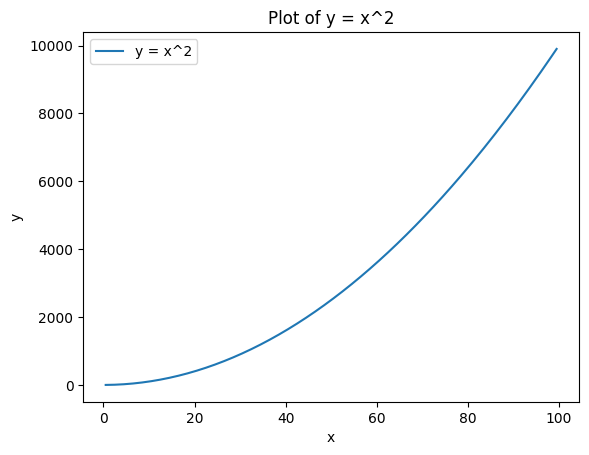

In [25]:
plt.plot(x_values, y_values1, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()
plt.show()

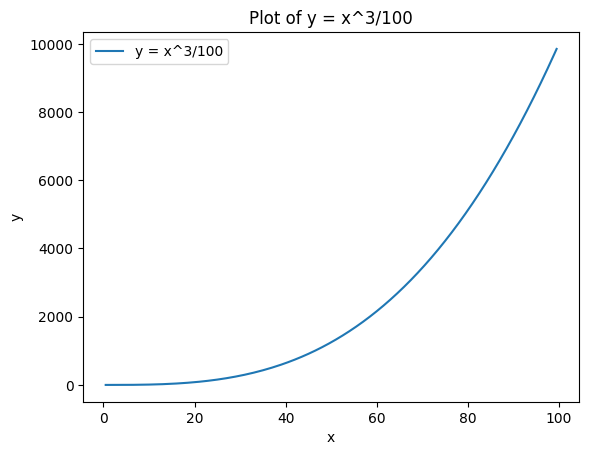

In [26]:

plt.plot(x_values, y_values2, label='y = x^3/100')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')
plt.legend()
plt.show()


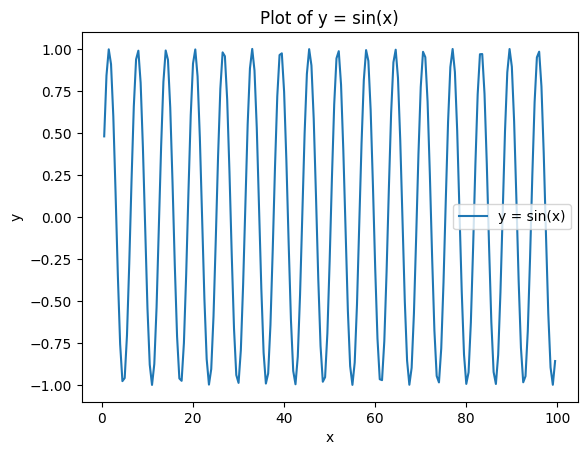

In [27]:
plt.plot(x_values, y_values3, label='y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()
plt.show()

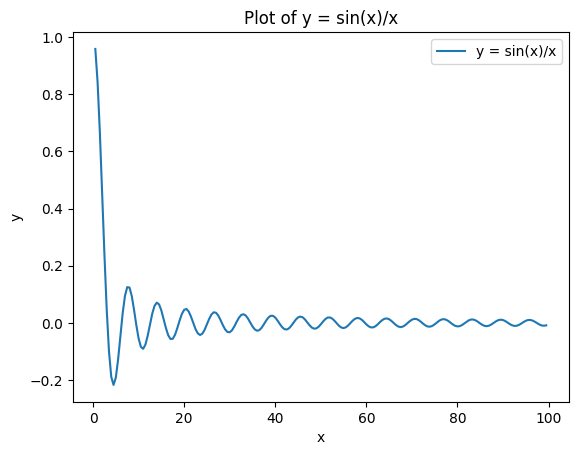

In [28]:
plt.plot(x_values, y_values4, label='y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')
plt.legend()
plt.show()

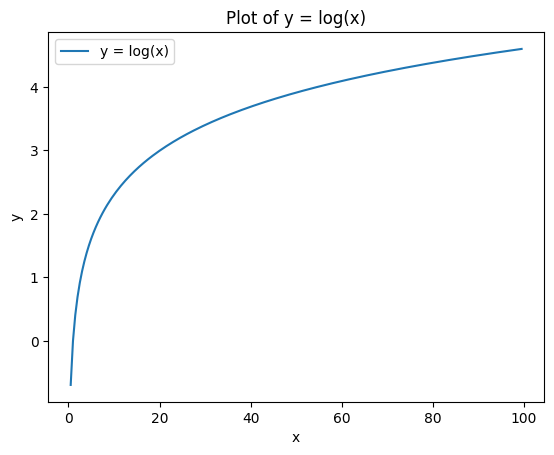

In [29]:
plt.plot(x_values, y_values5, label='y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.legend()
plt.show()

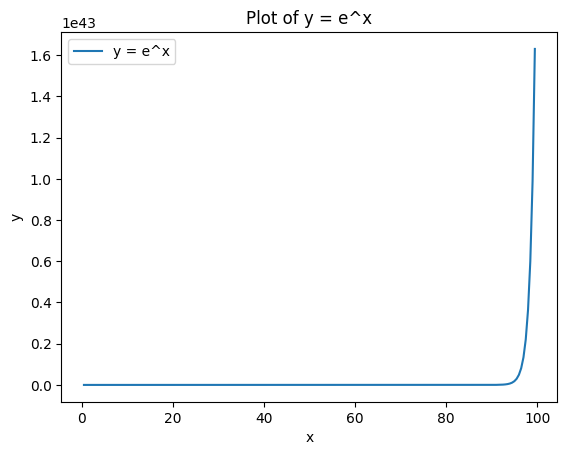

In [30]:
plt.plot(x_values, y_values6, label='y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.legend()
plt.show()


# Q:10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [19]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix of random values uniformly distributed between 1 and 2
random_matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame
df = pd.DataFrame(random_matrix, columns=["a", "b", "c", "d", "e"])

#standard deviations of columns
std_of_columns = df.std(axis=0)
# column with the highest standard deviation
max_std_column = std_of_columns.idxmax()
#mean of rows
mean_of_rows = df.mean(axis=1)
# lowest mean
min_mean_row = mean_of_rows.idxmin()

# Print the results
print("Column with highest standard deviation:", max_std_column)
print("Row with lowest mean:", min_mean_row)


Column with highest standard deviation: d
Row with lowest mean: 14


# Q:11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [20]:
# Add a new column "f" to the DataFrame df with the sum of columns "a" to "e"
df = df.assign(f=lambda x: (x.a + x.b + x.c + x.d + x.e))

# Add a new column "g" with "LT8" if the value in column "f" is less than 8, and "GT8" otherwise
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

# Create a DataFrame (df_LT8)
df_LT8 = df[df.g == "LT8"]

# Calculate the number of rows in df_LT8
num_rows_LT8 = len(df_LT8)

# Print
print("Number of rows where 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' where 'g' is 'LT8':", df_LT8["f"].std())

df_GT8 = df[df.g == "GT8"]

print("Standard deviation of column 'f' where 'g' is 'GT8':", df_GT8["f"].std())


Number of rows where 'g' is 'LT8': 13
Standard deviation of column 'f' where 'g' is 'LT8': 0.5089648353753622
Standard deviation of column 'f' where 'g' is 'GT8': 0.20434480002204614


# Q:12 Write a small piece of code to explain broadcasting in numpy.

In [17]:
import numpy as np

# INPUTS
a = np.array([1, 2, 3])
b = np.array([[2, 4, 8], [2, 7, 3]])
result = a * b

# Print the result
print("Array 'a':", a)
print("Scalar 'b':", b)
print("Result after broadcasting:")
print(result)

Array 'a': [1 2 3]
Scalar 'b': [[2 4 8]
 [2 7 3]]
Result after broadcasting:
[[ 2  8 24]
 [ 2 14  9]]
